In [1]:
#importing part 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#functions part

#this method calculate polynomial features of degree n
def featureOnDegreeN(x, n) :
    t = np.copy(x)
    #in each iterate X is modified
    for i in range(2, n+1) :
        t = np.concatenate((t, np.power(np.reshape(x[ : , 1],(-1,1)), i)), axis=1)
    #then returned the modified x
    return t

#this function is calculate MSE of inputs
def MSE(X, Y, w) :
    #s is in actual sum of e
    s = 0
    for i in range(X.shape[0]) :
        #calculate predicated value
        #first we achieve predicated value
        predicatedValue=np.dot(X[i].reshape(-1, X.shape[1]), w)[0][0]
        #then modify s
        s = (predicatedValue - Y[i])[0] ** 2
    return s / X.shape[0]

train_X:  (200, 1)
train_Y:  (200, 1)
test_X:  (100, 1)
test_Y:  (100, 1)
new train_X:  (200, 2)
new test_X:  (100, 2)


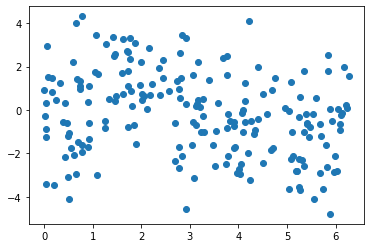

In [3]:
#initializing and display part

#reading train_set and test_set files
#initialize train_X, train_Y, test_X, test_Y
train_X = np.reshape(pd.read_csv("train_set.csv").to_numpy()[ : , 0], (-1, 1))
train_Y = np.reshape(pd.read_csv("train_set.csv").to_numpy()[ : , 1], (-1, 1))
test_X = np.reshape(pd.read_csv("test_set.csv").to_numpy()[ : , 0], (-1, 1))
test_Y = np.reshape(pd.read_csv("test_set.csv").to_numpy()[ : , 1], (-1, 1))

#print shapes  of train_X, train_Y, test_X, test_Y
print("train_X: ", train_X.shape)
print("train_Y: ", train_Y.shape)
print("test_X: ", test_X.shape)
print("test_Y: ", test_Y.shape)

#plot the data set
plt.scatter( train_X, train_Y)

#before concate x0 must be give backup from train_X and train_y
backup_X = np.copy(train_X)
backup_Y = np.copy(test_X)
#add first one(x0) of train_X and test_X to themselves and print them new shapes
train_X = np.concatenate((np.ones((train_X.shape[0],1)),train_X),axis=1)
test_X = np.concatenate((np.ones((test_X.shape[0],1)),test_X),axis=1)
print("new train_X: ", train_X.shape)
print("new test_X: ", test_X.shape)

In [4]:
#we now that w(hat) = (X(transpose) * X)^-1 * X(transpose) * Y
#so calculate w(hat) for train_X and train_Y then prin it
w_hat = np.matmul(np.linalg.inv(np.matmul(np.transpose(train_X), train_X)), np.matmul(np.transpose(train_X), train_Y))
print(w_hat)

[[ 0.6421799 ]
 [-0.26644821]]


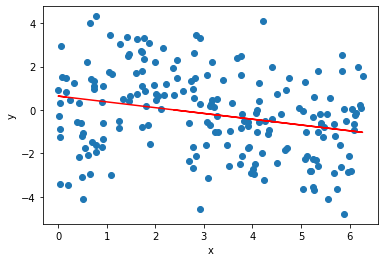

In [5]:
#then we Plot the estimated decision line on dataset 
x_hy = np.reshape(backup_X, (backup_X.shape[0]))
y_hy = x_hy * w_hat[1] + w_hat[0]
plt.scatter(backup_X[:,0], train_Y[:,0], cmap=plt.cm.Spectral)
plt.plot(x_hy, y_hy, '-' , c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
#now we calculating polynomial features of degree 5 for train_x and test_X and its shape
p = featureOnDegreeN(train_X, 5)
p_test = featureOnDegreeN(test_X, 5)
print(p.shape)
print(p_test.shape)

samples = [10, 25, 50, 100, 200]
weights = []

#we now that w(hat) = (X(transpose) * X)^-1 * X(transpose) * Y
#so calculate w(hat) for p[ : i] and train_Y[ : i] then print it for each sample one
for i in samples :
    weights.append(np.matmul(np.linalg.inv(np.matmul(np.transpose(p[ : i]), p[ : i])), np.matmul(np.transpose(p[ : i]), train_Y[ : i])))
    
print("weights_list:  ",weights)

(200, 6)
(100, 6)
weights_list:   [array([[ 286.01161799],
       [-421.97367917],
       [ 239.92812983],
       [ -65.31049793],
       [   8.54769436],
       [  -0.43283446]]), array([[-1.22308702],
       [ 5.76250133],
       [-4.57263022],
       [ 1.67176263],
       [-0.28769114],
       [ 0.01808571]]), array([[-1.34669470e+00],
       [ 2.99797164e+00],
       [-1.06879844e+00],
       [ 1.32971184e-01],
       [-1.79862634e-02],
       [ 1.95296626e-03]]), array([[-0.45145294],
       [ 0.58160111],
       [ 0.97851162],
       [-0.62673533],
       [ 0.10661027],
       [-0.00536244]]), array([[-0.50717654],
       [ 0.41741085],
       [ 1.17048501],
       [-0.73986671],
       [ 0.13511055],
       [-0.00772431]])]


In [7]:
#with written method MSE first calculate MSE for train and test for each model
#then append result to lists
#then print results
MSETrain = []
MSETest = []
for i in range(len(weights)) :
    x1 = MSE(p, train_Y, weights[i])
    x2 = MSE(p_test, test_Y, weights[i])
    MSETrain.append(x1)
    MSETest.append(x2)
    #display results
    print("MSE for model with ", samples[i], " training data is:  train MSE : ", x1,"   and test MSE : ", x2)

MSE for model with  10  training data is:  train MSE :  252.08699197499922    and test MSE :  0.16329511744581332
MSE for model with  25  training data is:  train MSE :  0.018008983199359122    and test MSE :  0.0018622199752118785
MSE for model with  50  training data is:  train MSE :  0.028131763473041076    and test MSE :  0.0005082834227121309
MSE for model with  100  training data is:  train MSE :  0.0162996105141358    and test MSE :  0.00019804168555466757
MSE for model with  200  training data is:  train MSE :  0.01771963674545049    and test MSE :  5.200237920931581e-07


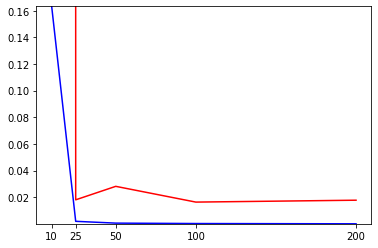

In [8]:
plt.plot(samples, MSETrain, c="red")
plt.plot(samples, MSETest, c="blue")
plt.xticks(samples)
plt.ylim(min(MSETest), max(MSETest))
plt.show()

همانطور که  نتایج را میبینیم واضح است که روی داده اول اورفیت میکند...روی داده دوم به خوبی تشخیص نمیدهد ولی رفته رفته دقت بهتر میشود و هیچ یک اورفیت نمیکند